# Hieu Nghiem
## CS5783 Assignment2

##QUESTION 2

First, importing the libraries which we will use:

In [1]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

Mounted at /content/drive/


Define activation functions

In [2]:
#sigmoid
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a
def sigmoid_derivative(z):
    a = sigmoid(z)*(1-sigmoid(z))
    return a
#relu
def relu(z):
    a = np.maximum(0,z)
    return a
def relu_derivative(z):
    a = np.where(z>0, 1, 0)
    return a
#tanh
def tanh(z):
    a = 2/(1+np.exp(-2*z))-1
    return a
def tanh_derivative(z):
    a = 1 - np.square(tanh(z))
    return a
#linear
def linear(z): 
    a = z
    return a
def linear_derivative(z):
    a = np.where(z>=0, 1, 1)
    return a


Define neural network function

In [3]:
#Forward propagation
def forwardprop(X, WB):
    AZ = {}
    AZ['Z1'] = np.dot(WB['W1'], X) + WB['B1']
    AZ['A1'] = sigmoid(AZ['Z1'])
    
    AZ['Z2'] = np.dot(WB['W2'], AZ['A1']) + WB['B2']
    AZ['A2'] = AZ['Z2']

    return AZ

#Backpropagation
def backprop(WB, AZ, X, Y):
    m = len(Y)
    dWB = {}
    
    dZ2 = 1/m * (AZ['A2'] - Y)
    dWB['W2'] = 1/m * np.dot(dZ2,AZ['A1'].T)
    dWB['B2'] = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(WB['W2'].T, dZ2), sigmoid_derivative(AZ['Z1']))    
    dWB['W1'] = 1/m * np.dot(dZ1, X.T)
    dWB['B1'] = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dWB

#Mean square error cost function
def mse(AZ, Y):
    Y = AZ['A2']
    mse = 1/(2*len(Y)) * np.sum(np.square(Y - Y_train))
    return mse

#model prediction
def predict(X, WB):
    predict = forwardprop(X.T, WB)['A2'].T
    return predict

Read data and choose a set of parameters for the function

In [4]:
#Read data
X_test = np.loadtxt('/content/drive/MyDrive/X_test.csv')
Y_test = np.loadtxt('/content/drive/MyDrive/Y_test.csv')
X_train = np.loadtxt('/content/drive/MyDrive/X_train.csv')
Y_train = np.loadtxt('/content/drive/MyDrive/Y_train.csv')

#Parameter for the model: layer size, iteration and learning rate
iteration = 10000
learning_rate = 0.5
layer_size = 10

1. What is the activation function use for the output? I will use identity function y = a since it is a standard regression problem
2. How many neurons in the output layer? One neuron for the only output, because this is a standard regression problem

3. Report average MSE (cost)
4. Plot loss as a function of the number of iterations

Cost at iteration 0 = 285482.0276699078

Cost at iteration 1000 = 3429.183508161412

Cost at iteration 2000 = 1076.2786045121684

Cost at iteration 3000 = 560.6842798865205

Cost at iteration 4000 = 353.4387340066302

Cost at iteration 5000 = 243.2433397466296

Cost at iteration 6000 = 179.16580238003704

Cost at iteration 7000 = 138.30176804583823

Cost at iteration 8000 = 109.90225083256212

Cost at iteration 9000 = 89.19750540472549

Average cost =  3662.4110079996863


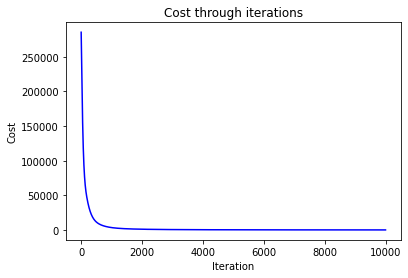

In [5]:
#Weight + bias and cost initialization
WB = {}
WB['W1'] = np.random.randn(layer_size,2)
WB['B1'] = np.random.randn(layer_size,1)
WB['W2'] = np.random.randn(1,layer_size)
WB['B2'] = np.random.randn(1,1)

costs = []
#loop for each iteration
for i in range(iteration):
    #forward
    AZ = forwardprop(X_train.T, WB)
    #calculate cost function
    cost = mse(AZ, Y_train.T)
    #back prop
    dWB = backprop(WB, AZ, X_train.T, Y_train.T)
    #updated current parameter for weight and bias
    current_WB = {}
    current_WB['W2'] = WB['W2'] - learning_rate * dWB['W2']
    current_WB['B2'] = WB['B2'] - learning_rate * dWB['B2']
    current_WB['W1'] = WB['W1'] - learning_rate * dWB['W1']
    current_WB['B1'] = WB['B1'] - learning_rate * dWB['B1']    
    if i%1000==0:
      print('Cost at iteration ' + str(i) + ' = ' + str(cost) + '\n')    
    WB = current_WB
    costs.append(cost)
  
print('Average cost = ', np.mean(costs))

#Plotting

plt.title("Cost through iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(costs, color ="blue")
plt.show()

5. Effect of the learning rates:

Choose learning rates 0.001, 0.01, 0.1, 0.5, 1. With default iteration = 10000, you can see the average cost is significantly decreased when learning rate start from 0.1 and up. The learning rate contributes a lot to the performance of the model


Average cost with learning rate 0.001 is 260196.23350971137
Average cost with learning rate 0.01 is 91397.313084183
Average cost with learning rate 0.1 is 5103.247515388641
Average cost with learning rate 0.5 is 138.18316553874428
Average cost with learning rate 1 is 9.605702601814361


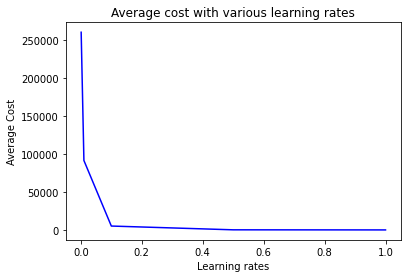

In [6]:
#Learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
#Weight + bias and cost initialization
WB = {}
WB['W1'] = np.random.randn(layer_size,2)
WB['B1'] = np.random.randn(layer_size,1)
WB['W2'] = np.random.randn(1,layer_size)
WB['B2'] = np.random.randn(1,1)
avg_costs = []

for learning_rate in learning_rates:
  costs = []
  #loop for each iteration
  for i in range(iteration):
    #forward
    AZ = forwardprop(X_train.T, WB)
    #calculate cost function
    cost = mse(AZ, Y_train.T)
    #back prop
    dWB = backprop(WB, AZ, X_train.T, Y_train.T)
    #updated current parameter for weight and bias
    current_WB = {}
    current_WB['W2'] = WB['W2'] - learning_rate * dWB['W2']
    current_WB['B2'] = WB['B2'] - learning_rate * dWB['B2']
    current_WB['W1'] = WB['W1'] - learning_rate * dWB['W1']
    current_WB['B1'] = WB['B1'] - learning_rate * dWB['B1']    
    WB = current_WB
    costs.append(cost)
  print('Average cost with learning rate', learning_rate,'is', np.mean(costs))
  avg_costs.append(np.mean(costs))


plt.title("Average cost with various learning rates")
plt.xlabel("Learning rates")
plt.ylabel("Average Cost")
plt.plot(learning_rates,avg_costs, color ="blue")
plt.show()

6. The more number of neurons in the hidden layer, the more number of weight and bias parameters in the model. Model will be trained better with lower average costs - as you can see in this model, avg cost reduced significantly when number of neurons > 2

  However we need to choose an optimum number of neurons to avoid more complexity and overfitting.
  Update rule don't need to be derived again but need to calculate again because parameters w and b has changed.

Average cost with layer size = 1 is 59410.555902012755
Average cost with layer size = 2 is 18995.468366932273
Average cost with layer size = 3 is 10143.788416647227
Average cost with layer size = 4 is 5398.077184822758
Average cost with layer size = 5 is 4534.180997630617
Average cost with layer size = 6 is 3132.858714384658
Average cost with layer size = 7 is 2919.0759320285183
Average cost with layer size = 8 is 2357.856040983096
Average cost with layer size = 9 is 2084.653841334998
Average cost with layer size = 10 is 2050.4570045897844
Final loss for the model is 21.11225325253191


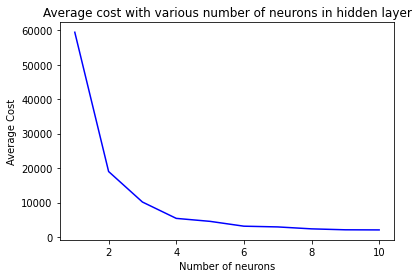

In [7]:
#Layer size
layer_sizes = np.arange(1,11,1)
avg_costs_l = []
for layer_size in layer_sizes:
  #Weight + bias and cost initialization
  WB = {}
  WB['W1'] = np.random.randn(layer_size,2)
  WB['B1'] = np.random.randn(layer_size,1)
  WB['W2'] = np.random.randn(1,layer_size)
  WB['B2'] = np.random.randn(1,1)

  costs = []
  #loop for each iteration
  for i in range(iteration):
    #forward
    AZ = forwardprop(X_train.T, WB)
    #calculate cost function
    cost = mse(AZ, Y_train.T)
    #back prop
    dWB = backprop(WB, AZ, X_train.T, Y_train.T)
    #updated current parameter for weight and bias
    current_WB = {}
    current_WB['W2'] = WB['W2'] - learning_rate * dWB['W2']
    current_WB['B2'] = WB['B2'] - learning_rate * dWB['B2']
    current_WB['W1'] = WB['W1'] - learning_rate * dWB['W1']
    current_WB['B1'] = WB['B1'] - learning_rate * dWB['B1']    
    WB = current_WB
    costs.append(cost)
  print('Average cost with layer size =',layer_size, 'is', np.mean(costs))
  avg_costs_l.append(np.mean(costs))

print('Final loss for the model is', costs[-1])
plt.title("Average cost with various number of neurons in hidden layer")
plt.xlabel("Number of neurons")
plt.ylabel("Average Cost")
plt.plot(layer_sizes ,avg_costs_l, color ="blue")
plt.show()



When plotting Y and Y predicted, they fit the y = x line pretty well. That means the prediction performance is very good with low error.

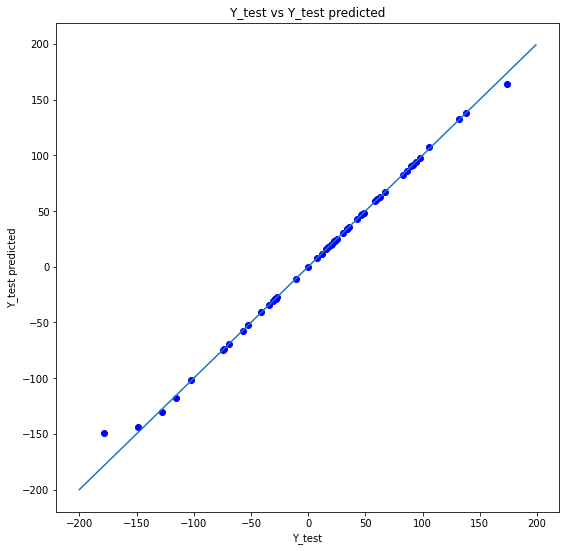

In [8]:
#Prediction and plot Y vs Y predicted
predict(X_test, WB)
predict_y = predict(X_test, WB)
plt.figure(figsize=(9,9))
plt.title("Y_test vs Y_test predicted")
plt.xlabel("Y_test")
plt.ylabel("Y_test predicted")
plt.scatter(Y_test, predict_y, color='blue')
x=np.arange(-200,200,1)
plt.plot(x, x)
plt.show()

7. Activation function in the network use to transform the output in different layer into input for the next layer (in terms of forward propagation). For backpropagation, since the update rule depends on the derivative of activation function, we need to calculate the update rule again when we use different activation function.

  We will do experiment with RELU and TANH activation function and compare them with Sigmoid 

In [9]:
#RELU Forward propagation and back propagation
def relu_forwardprop(X, WB):
    AZ = {}
    AZ['Z1'] = np.dot(WB['W1'], X) + WB['B1']
    AZ['A1'] = relu(AZ['Z1'])
    
    AZ['Z2'] = np.dot(WB['W2'], AZ['A1']) + WB['B2']
    AZ['A2'] = AZ['Z2']

    return AZ

def relu_backprop(WB, AZ, X, Y):
    m = len(Y)
    dWB = {}
    
    dZ2 = 1/m * (AZ['A2'] - Y)
    dWB['W2'] = 1/m * np.dot(dZ2,AZ['A1'].T)
    dWB['B2'] = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(WB['W2'].T, dZ2), relu_derivative(AZ['Z1']))    
    dWB['W1'] = 1/m * np.dot(dZ1, X.T)
    dWB['B1'] = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dWB

#TANH Forward propagation and back propagation
def tanh_forwardprop(X, WB):
    AZ = {}
    AZ['Z1'] = np.dot(WB['W1'], X) + WB['B1']
    AZ['A1'] = tanh(AZ['Z1'])
    
    AZ['Z2'] = np.dot(WB['W2'], AZ['A1']) + WB['B2']
    AZ['A2'] = AZ['Z2']

    return AZ

def tanh_backprop(WB, AZ, X, Y):
    m = len(Y)
    dWB = {}
    
    dZ2 = 1/m * (AZ['A2'] - Y)
    dWB['W2'] = 1/m * np.dot(dZ2,AZ['A1'].T)
    dWB['B2'] = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(WB['W2'].T, dZ2), tanh_derivative(AZ['Z1']))    
    dWB['W1'] = 1/m * np.dot(dZ1, X.T)
    dWB['B1'] = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dWB
#Redefine parameters and re-initialize the parameters
iteration = 10000
learning_rate = 0.5
layer_size = 10

WB = {}
WB['W1'] = np.random.randn(layer_size,2)
WB['B1'] = np.random.randn(layer_size,1)
WB['W2'] = np.random.randn(1,layer_size)
WB['B2'] = np.random.randn(1,1)
INIT_WB = WB


Final cost with Relu as activation function =  0.4651388457249691


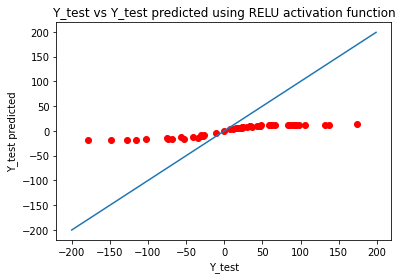

Final cost with TANH as activation function =  3.533538892805787


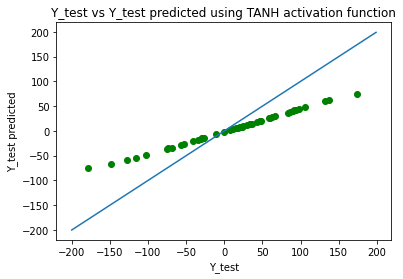

Final cost with Sigmoid as activation function =  46.09919172196483


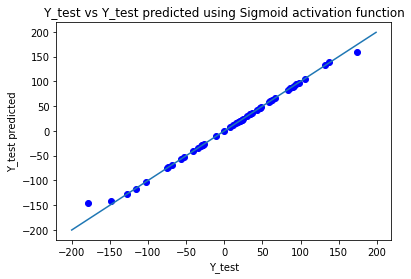

In [10]:
#RELU ACTIVATION
#########################################
costs = []
WB = INIT_WB
#loop for each iteration
for i in range(iteration):
  #forward
  AZ = relu_forwardprop(X_train.T, WB)
  #calculate cost function
  cost = mse(AZ, Y_train.T)
  #back prop
  dWB = relu_backprop(WB, AZ, X_train.T, Y_train.T)
  #updated current parameter for weight and bias
  current_WB = {}
  current_WB['W2'] = WB['W2'] - learning_rate * dWB['W2']
  current_WB['B2'] = WB['B2'] - learning_rate * dWB['B2']
  current_WB['W1'] = WB['W1'] - learning_rate * dWB['W1']
  current_WB['B1'] = WB['B1'] - learning_rate * dWB['B1']    
  WB = current_WB
  costs.append(cost)

print('Final cost with Relu as activation function = ', costs[-1])
predict(X_test, WB)
predict_y = predict(X_test, WB)
plt.title("Y_test vs Y_test predicted using RELU activation function")
plt.xlabel("Y_test")
plt.ylabel("Y_test predicted")
plt.scatter(Y_test, predict_y, color='red')
x=np.arange(-200,200,1)
plt.plot(x, x)
plt.show()


#TANH ACTIVATION
#########################################
WB = INIT_WB #using same initialized weight and bias parameters as RELU for comparison
costs = []
#loop for each iteration
for i in range(iteration):
  #forward
  AZ = tanh_forwardprop(X_train.T, WB)
  #calculate cost function
  cost = mse(AZ, Y_train.T)
  #back prop
  dWB = tanh_backprop(WB, AZ, X_train.T, Y_train.T)
  #updated current parameter for weight and bias
  current_WB = {}
  current_WB['W2'] = WB['W2'] - learning_rate * dWB['W2']
  current_WB['B2'] = WB['B2'] - learning_rate * dWB['B2']
  current_WB['W1'] = WB['W1'] - learning_rate * dWB['W1']
  current_WB['B1'] = WB['B1'] - learning_rate * dWB['B1']    
  WB = current_WB
  costs.append(cost)

print('Final cost with TANH as activation function = ', costs[-1])
predict(X_test, WB)
predict_y = predict(X_test, WB)
plt.title("Y_test vs Y_test predicted using TANH activation function")
plt.xlabel("Y_test")
plt.ylabel("Y_test predicted")
plt.scatter(Y_test, predict_y, color='green')
x=np.arange(-200,200,1)
plt.plot(x, x)
plt.show()

#SIGMOID ACTIVATION
#########################################
WB = INIT_WB #using same initialized weight and bias parameters as RELU for comparison
costs = []
#loop for each iteration
for i in range(iteration):
  #forward
  AZ = forwardprop(X_train.T, WB)
  #calculate cost function
  cost = mse(AZ, Y_train.T)
  #back prop
  dWB = backprop(WB, AZ, X_train.T, Y_train.T)
  #updated current parameter for weight and bias
  current_WB = {}
  current_WB['W2'] = WB['W2'] - learning_rate * dWB['W2']
  current_WB['B2'] = WB['B2'] - learning_rate * dWB['B2']
  current_WB['W1'] = WB['W1'] - learning_rate * dWB['W1']
  current_WB['B1'] = WB['B1'] - learning_rate * dWB['B1']    
  WB = current_WB
  costs.append(cost)


print('Final cost with Sigmoid as activation function = ', costs[-1])
predict(X_test, WB)
predict_y = predict(X_test, WB)
plt.title("Y_test vs Y_test predicted using Sigmoid activation function")
plt.xlabel("Y_test")
plt.ylabel("Y_test predicted")
plt.scatter(Y_test, predict_y, color='blue')
x=np.arange(-200,200,1)
plt.plot(x, x)
plt.show()

RELU and TANH activation function indicate better final cost after 10000 iterations for the model than SIGMOID.

However when plotting Y vs Y_predicted, RELU and TANH are poorly fit into the line y = x. SIGMOID shows almost perfect fit to the line which indicate a very good performance for the model but also overfitting may happen.